In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, QuantileRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Dummy Data/sample_data.csv")
df = df.sort_values(by="postDate")

In [4]:
df["postDate"] = pd.to_datetime(df["postDate"])

In [5]:
df["Year"] = df["postDate"].apply(lambda time: time.year)

df["Month"] = df["postDate"].apply(lambda time: time.month)

df["Day"] = df["postDate"].apply(lambda time: time.day)

df["Hour"] = df["postDate"].apply(lambda time: time.hour)

df["Minute"] = df["postDate"].apply(lambda time: time.minute)

df["Second"] = df["postDate"].apply(lambda time: time.second)

In [6]:
df

,type,id,status,description,amount,account,balance,direction,class,institution,...,transactionDate,postDate,subClass,links,Year,Month,Day,Hour,Minute,Second
288,transaction,312885c2-6ff6-4d96-89c9-0bf1b2987f46,posted,AGL RETAIL ENERGY LTD (GAS),-92.0,070c1d68-0ee0-477a-9679-294ea7059939,-99.34,debit,payment,AU00000,...,10/12/2021,2021-12-10 00:00:00+00:00,"{\title\"":\""Electricity Distribution\""","\""code\"":\""263\""}""",2021,12,10,0,0,0
287,transaction,414279bc-9226-45c5-9722-b18269374373,posted,AGL RETAIL ENERGY LTD (GAS),-160.0,070c1d68-0ee0-477a-9679-294ea7059939,-259.34,debit,payment,AU00000,...,10/12/2021,2021-12-10 00:00:00+00:00,"{\title\"":\""Electricity Distribution\""","\""code\"":\""263\""}""",2021,12,10,0,0,0
286,transaction,8598b570-b80f-42a6-9a52-e73425b3ccd0,posted,TFR Acc14000 TO 12389,-500.0,070c1d68-0ee0-477a-9679-294ea7059939,-759.34,debit,payment,AU00000,...,13/12/2021,2021-12-13 00:00:00+00:00,"{\title\"":\""Legal and Accounting Services\""","\""code\"":\""693\""}""",2021,12,13,0,0,0
285,transaction,1973ec3d-7680-45dd-ac2e-e1eb97c97ea3,posted,Manly Maths Tutor Wages,201.0,070c1d68-0ee0-477a-9679-294ea7059939,-558.34,credit,transfer,AU00000,...,14/12/2021,2021-12-14 00:00:00+00:00,"{\title\"":\""Educational Support Services\""","\""code\"":\""822\""}""",2021,12,14,0,0,0
284,transaction,5b20b38e-6c98-4bfc-97bc-7c9ea2ccc983,posted,Manly Maths Tutor Wages,201.0,070c1d68-0ee0-477a-9679-294ea7059939,-357.34,credit,transfer,AU00000,...,26/12/2021,2021-12-16 00:00:00+00:00,"{\title\"":\""Educational Support Services\""","\""code\"":\""822\""}""",2021,12,16,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,transaction,d12df6a2-48b6-4f5f-a718-ccb377aa330c,posted,Transfer Platnm Homeloan 346454,-3852.5,070c1d68-0ee0-477a-9679-294ea7059939,22514.56,debit,payment,AU00000,...,29/07/2023,2023-07-29 00:00:00+00:00,"{\title\"":\""Auxiliary Finance and Investment S...","\""code\"":\""641\""}""",2023,7,29,0,0,0
3,transaction,1ab3a3c5-faeb-4de3-b5aa-612e5bc76fd5,posted,Non Hooli ATM Withdrawal Fee,-2.5,070c1d68-0ee0-477a-9679-294ea7059939,22512.06,debit,bank-fee,AU00000,...,3/08/2023,2023-08-03 00:00:00+00:00,"{\title\"":\""\""","\""code\"":\""card\""}""",2023,8,3,0,0,0
2,transaction,323f6d42-a38e-4c46-83d2-6c8f3e999686,posted,Wdl ATM WES IGA BALGOWLAH HGT BALGOWL AU,-200.0,070c1d68-0ee0-477a-9679-294ea7059939,22312.06,debit,cash-withdrawal,AU00000,...,3/08/2023,2023-08-03 00:00:00+00:00,NaN,"{\self\"":\""https://au-api.basiq.io/users/bca4b...",2023,8,3,0,0,0
1,transaction,0d6e11ab-e28e-4de0-a152-600cc44fb61c,posted,Non Hooli ATM Withdrawal Fee,-2.5,070c1d68-0ee0-477a-9679-294ea7059939,22309.56,debit,bank-fee,AU00000,...,3/08/2023,2023-08-03 00:00:00+00:00,"{\title\"":\""\""","\""code\"":\""card\""}""",2023,8,3,0,0,0


In [7]:
# Drop unnecessary columns
df.drop(["type", "id", "status", "description", "account", "direction", "class", "institution", "connection", "enrich", "transactionDate", "postDate", "subClass", "links"], axis=1, inplace=True)

# Handle missing values (if any)
df.dropna(inplace=True)

# Split the data into features (X) and target (y)
X = df[["amount", "Year", "Month", "Day", "Hour", "Minute", "Second"]]
y = df[["balance"]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = RandomForestRegressor()

In [9]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=1, verbose=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5; 1/81] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 1/5; 1/81] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-1486274.140 total time=   0.0s
[CV 2/5; 1/81] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 2/5; 1/81] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-2378515.147 total time=   0.0s
[CV 3/5; 1/81] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 3/5; 1/81] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-5172717.531 total time=   0.0s
[CV 4/5; 1/81] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 4/5; 1/81] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-2421784.002 total time=   0.0s
[CV 5/5; 1/81] START max_d

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=10)

In [10]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(best_params)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [11]:
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 1844826.441998729
R-squared: 0.9166861631993493
Root Mean Squared Error: 1358.2438816349327


In [12]:
# model.fit(X_train, y_train)

# # Predict on the test set
# y_pred = model.predict(X_test)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print("Mean Squared Error:", mse)
# print("R-squared:", r2)

In [13]:
# models = {
#     "Linear Regression": LinearRegression(),
#     "Decision Tree Regression": DecisionTreeRegressor(),
#     "Random Forest Regression": RandomForestRegressor(),
#     "Stochastic Gradient Descent": SGDRegressor(), 
#     "Ridge Regression": Ridge(), 
#     "Quantile Regression": QuantileRegressor()
# }

In [14]:
# for model_name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)

#     # Evaluate the model
#     mse = mean_squared_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)

#     print(f"Model: {model_name}")
#     print("Mean Squared Error:", mse)
#     print("R-squared:", r2)
#     print("------------------------")

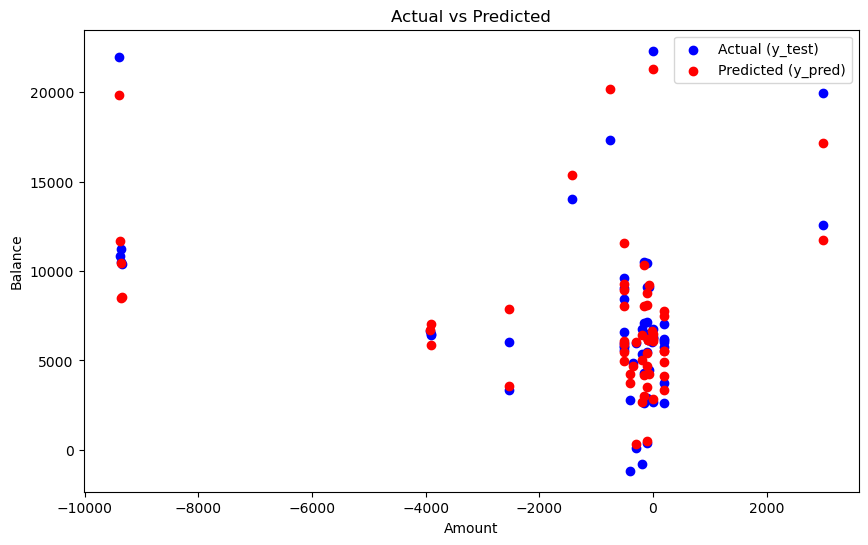

In [15]:
plt.figure(figsize=(10, 6))

# Scatter plot for y_test in blue color
plt.scatter(X_test["amount"], y_test, color='blue', label='Actual (y_test)')

# Scatter plot for y_pred in red color
plt.scatter(X_test["amount"], y_pred, color='red', label='Predicted (y_pred)')

plt.xlabel("Amount")
plt.ylabel("Balance")
plt.title("Actual vs Predicted")
plt.legend()

plt.show()

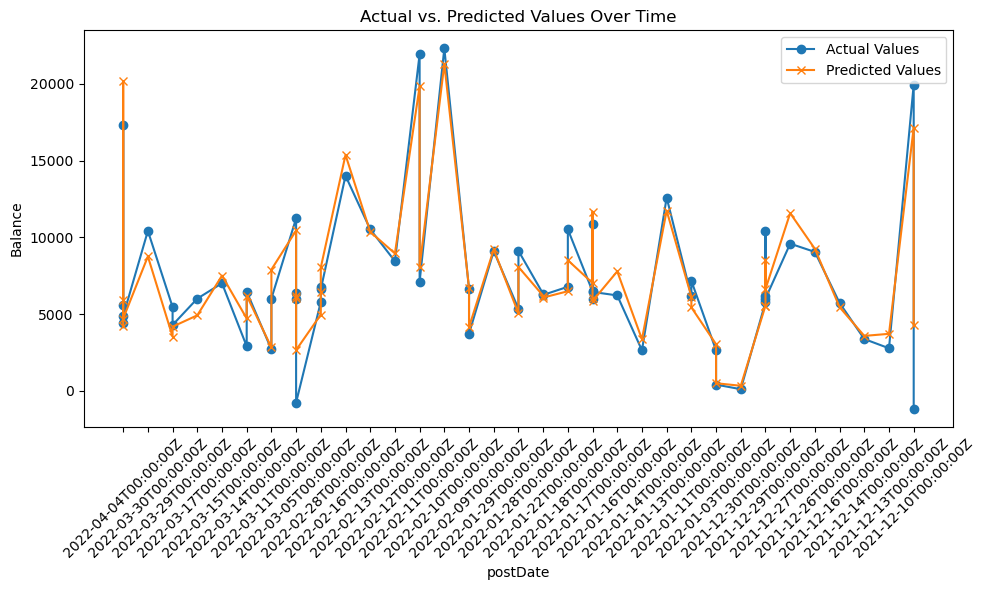

In [20]:
df = pd.read_csv("Dummy Data/sample_data.csv")
# Find the starting index of the test set
test_start_index = len(X_train)

# Extract corresponding dates for the test set
dates_test = df.iloc[test_start_index : test_start_index + len(X_test)]['postDate']
# plot
plt.figure(figsize=(10, 6))
plt.plot(dates_test, y_test, label='Actual Values', marker='o')
plt.plot(dates_test, y_pred, label='Predicted Values', marker='x')
plt.xlabel('postDate')
plt.ylabel('Balance')
plt.title('Actual vs. Predicted Values Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()